In [1]:
import tensorflow as tf
from agents.MemoryBuffer import MemoryBuffer
from agents.NeuralNetwork import NeuralNetwork
from environment.Simulator import Simulator
from agents.SlidingWindowAgent import SlidingWindowAgent
from environment.Config import ConfigTimeSeries
from environment.BaseEnvironment import TimeSeriesEnvironment
from environment.WindowStateEnvironment import WindowStateEnvironment


# for subdir, dirs, files in os.walk("../ts_data/A1Benchmark"):
#     for file in files:
#         if file.find('.csv') != -1:


config = ConfigTimeSeries()
env = WindowStateEnvironment(
    TimeSeriesEnvironment(verbose=True, filename="A1Benchmark/real_7.csv", config=config))

dqn = NeuralNetwork(input_dim=env.window_size,
                    input_neurons=env.window_size + 1, hidden_neurons=env.window_size*4, type="lstm").keras_model

agent = SlidingWindowAgent(lstm=True, dqn=dqn, memory=MemoryBuffer(max=50000, id="sliding_window"), alpha=0.0001,
                           gamma=0.99, epsilon=1,
                           epsilon_end=0.1, epsilon_decay=0.5, fit_epoch=1, action_space=2, batch_size=512)

C:\Users\nils\Anaconda3\envs\master2020\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nils\Anaconda3\envs\master2020\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nils\Anaconda3\envs\master2020\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nils\Anaconda3\envs\master2020\lib\site-packages\ten

TimeSeries from: A1Benchmark/real_43.csv
 Header(labeled):
       value  anomaly
0  1.428015        0
1  1.407458        0
2  1.390932        0 
Header(unlabeled):
       value
0  1.428015
1  1.407458
2  1.390932 
Rows:
 1440
MeanValue:
 1.56
MaxValue:
 3.06
MinValue:
 1.33
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 25)             5100      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 256)            288768    
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 514       
Total params: 294,382
Trainable params: 294,382
Non-trainable params: 0
___________________________________________________________

Successfully stored to memory_sliding_window.obj
Memory is full, 5000 Samples stored. It took 2.866525173187256 seconds
Training Score now:  4
Training episode 0 took 167.24909806251526 seconds 
1
Training Score now:  674
Training episode 1 took 157.32562565803528 seconds 
0.5
Training Score now:  1116
Training episode 2 took 159.7377576828003 seconds 
0.25
Training Score now:  1336
Training episode 3 took 161.27464652061462 seconds 
0.125
Training Score now:  1336
Training episode 4 took 164.04423999786377 seconds 
0.1
Testing episode 5 took 1.4726498126983643 seconds


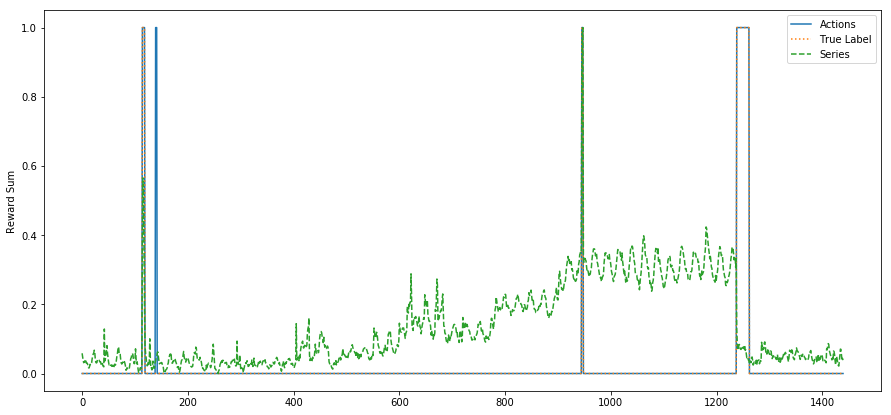

True

In [2]:
simulation = Simulator(5, agent, env, 1)
agent.memory.init_memory(env=env)
simulation.run()